<a href="https://www.kaggle.com/code/koenbotermans/pytorch-vs-tensorflow-ann?scriptVersionId=180194695" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Pytorch vs Tensorflow - ANN

In this notebook series I will give a code comparison between PyTorch and TensorFlow is vital for understanding deep learning because these two libraries are the most widely used frameworks in the field, each with its own syntax, features, and paradigms. Having a "Rosetta Stone" to translate between them is super convenient as it allows practitioners to leverage the strengths of both libraries, facilitates learning and collaboration across different teams, and ensures that models and research can be easily adapted and shared within the deep learning community, enhancing flexibility and innovation.

## In this notebook
In the first notebook of this series, I will start with the basics by creating a simple Artificial Neural Network (ANN) in both PyTorch and TensorFlow. We will train the ANN on the MNIST dataset, which consists of handwritten digit images, to illustrate fundamental concepts and workflows in each framework. This foundational exercise will set the stage for more complex models and comparisons in subsequent notebooks.

For both PyTorch and TensorFlow, the steps for training a model are essentially the same:

1. Importing the necessary libraries.
2. Defining the model parameters and hyperparameters.
3. Loading the dataset.
4. Preprocessing the data to make it suitable for training.
5. Initializing the model architecture.
6. Training the model using the defined parameters and dataset.

These steps form the core workflow in building and training deep learning models, regardless of the framework used.

# Tensorflow

In [1]:
import matplotlib.pyplot as plt
# Plotting the training metrics.
def plot_training_history(history):
    # Plotting loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


In [2]:
#1. Importing the necessary libraries.
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy

from tensorflow.keras.datasets import mnist

# 2. Defining the model parameters and hyperparameters.
hidden_1 = 64
hidden_2 = 64
n_classes = 10
n_epochs = 10
batch_size = 32
learning_rate = 0.001

#3. Loading the dataset.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#4. Preprocessing the data to make it suitable for training.
x_train, x_test = x_train.reshape(-1, 784).astype(np.float32), x_test.reshape(-1, 784).astype(np.float32)
x_train, x_test = x_train/255, x_test/255

y_train_encoded = np.zeros(shape=(y_train.shape[0], 10), dtype=int)
y_test_encoded = np.zeros(shape=(y_test.shape[0], 10), dtype=int)

y_train_encoded[np.linspace(0, len(y_train)-1, len(y_train)).astype(int), y_train]=1
y_test_encoded[np.linspace(0, len(y_test)-1, len(y_test)).astype(int), y_test]=1

# 5. Initializing the model architecture.
model = Sequential([
    Dense(units=hidden_1, activation="relu"),
    Dense(units=hidden_2, activation="relu"),
    Dense(units=n_classes, activation="softmax")
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=CategoricalCrossentropy(), metrics=["accuracy"])

# 6. Training the model using the defined parameters and dataset.
callback = model.fit(x=x_train, y=y_train_encoded, validation_data=(x_test, y_test_encoded), batch_size=batch_size, epochs=n_epochs)

2024-05-28 06:30:13.148549: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 06:30:13.148663: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 06:30:13.258126: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8588 - loss: 0.4855 - val_accuracy: 0.9559 - val_loss: 0.1433
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9615 - loss: 0.1309 - val_accuracy: 0.9616 - val_loss: 0.1202
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9734 - loss: 0.0920 - val_accuracy: 0.9665 - val_loss: 0.1080
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9785 - loss: 0.0691 - val_accuracy: 0.9717 - val_loss: 0.0887
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9818 - loss: 0.0572 - val_accuracy: 0.9756 - val_loss: 0.0808
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9864 - loss: 0.0431 - val_accuracy: 0.9719 - val_loss: 0.0899
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9877 - loss: 0.0386 - val_accuracy: 0.9725 - val_loss: 0.0937
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━

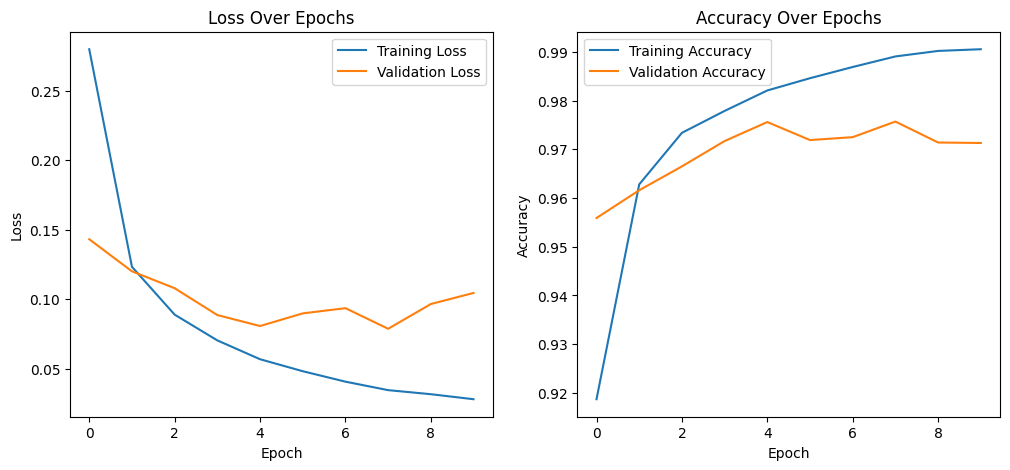

In [3]:
plot_training_history(history=callback)

# Pytorch

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15738562.72it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 472425.99it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4385871.01it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2492872.12it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



1875it [00:17, 106.59it/s]


Epoch 1/10, Train Loss: 0.4211, Train Accuracy: 0.8751, Test Loss: 0.2685, Test Accuracy: 0.9191


1875it [00:17, 107.97it/s]


Epoch 2/10, Train Loss: 0.2214, Train Accuracy: 0.9335, Test Loss: 0.1712, Test Accuracy: 0.9493


1875it [00:19, 93.87it/s] 


Epoch 3/10, Train Loss: 0.1730, Train Accuracy: 0.9470, Test Loss: 0.1561, Test Accuracy: 0.9516


1875it [00:19, 98.65it/s] 


Epoch 4/10, Train Loss: 0.1449, Train Accuracy: 0.9551, Test Loss: 0.1295, Test Accuracy: 0.9605


1875it [00:19, 95.96it/s]


Epoch 5/10, Train Loss: 0.1263, Train Accuracy: 0.9603, Test Loss: 0.1213, Test Accuracy: 0.9608


1875it [00:19, 93.96it/s]


Epoch 6/10, Train Loss: 0.1142, Train Accuracy: 0.9640, Test Loss: 0.0939, Test Accuracy: 0.9700


1875it [00:19, 94.12it/s]


Epoch 7/10, Train Loss: 0.1025, Train Accuracy: 0.9684, Test Loss: 0.0914, Test Accuracy: 0.9712


1875it [00:19, 95.11it/s]


Epoch 8/10, Train Loss: 0.0927, Train Accuracy: 0.9713, Test Loss: 0.0744, Test Accuracy: 0.9761


1875it [00:20, 92.33it/s]


Epoch 9/10, Train Loss: 0.0876, Train Accuracy: 0.9716, Test Loss: 0.0804, Test Accuracy: 0.9740


1875it [00:20, 93.48it/s]


Epoch 10/10, Train Loss: 0.0808, Train Accuracy: 0.9739, Test Loss: 0.0799, Test Accuracy: 0.9735


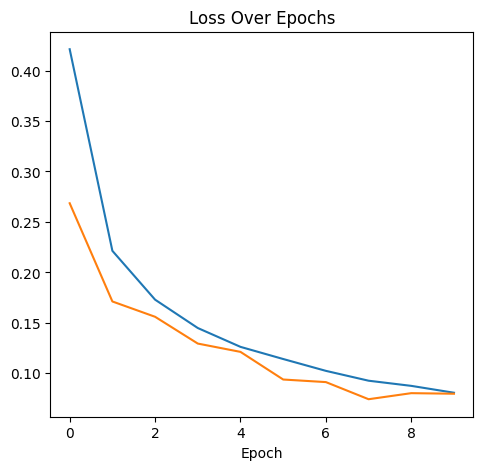

In [4]:
# 1. Importing the necessary libraries.
import os
import torch
import torchvision
from tqdm import tqdm
import torch.nn as nn
import matplotlib.pyplot as plt

# 2. Defining the model parameters and hyperparameters.
hidden_1 = 64
hidden_2 = 64
n_classes = 10
n_epochs = 10
batch_size = 32
learning_rate = 0.001

# 3. Loading the dataset.
trans = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                            torchvision.transforms.Normalize((0.5,), (1.0,))])
mnist_dataset_train = torchvision.datasets.MNIST(root=".", transform=trans, train=True, download=True)
mnist_dataset_test = torchvision.datasets.MNIST(root=".", transform=trans, download=False)

# 4. Preprocessing the data to make it suitable for training.
train_loader = torch.utils.data.DataLoader(
    dataset=mnist_dataset_train, 
    batch_size=batch_size, 
    shuffle=True)
test_loader = torch.utils.data.DataLoader(
    dataset=mnist_dataset_test, 
    batch_size=batch_size, 
    shuffle=False)

# 5. Initializing the model architecture.
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(28*28, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.out = nn.Linear(hidden_2, n_classes)
    
    def forward(self, x):
        x = x.reshape(-1, 28*28)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.out(x)
        return x

model = ANN()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss()

# Tracking metrics
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# 6. Training the model using the defined parameters and dataset.
for epoch in range(n_epochs):
    model.train()
    running_loss = 0
    correct_train = 0
    total_train = 0

    for batch_idx, (x_train, y_train) in tqdm(enumerate(train_loader)):
        optimizer.zero_grad()
        y_pred = model(x_train)
        loss = loss_function(y_pred, y_train)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(y_pred, 1)
        correct_train += (predicted == y_train).sum().item()
        total_train += y_train.size(0)

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct_train / total_train)

    model.eval()
    test_loss = 0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for x_test, y_test in test_loader:
            y_pred = model(x_test)
            loss = loss_function(y_pred, y_test)
            test_loss += loss.item()
            _, predicted = torch.max(y_pred, 1)
            correct_test += (predicted == y_test).sum().item()
            total_test += y_test.size(0)

    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(correct_test / total_test)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}')

# Plotting the training metrics
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.show()
